# DSCI 100 Section 008 - Project Proposal 

#### Group 30: Palak Tank, Sennon Hollow, Longyi Yuan, Iris Caglayan 

## Classification Analysis of Sleep Quality in Relation to Sleeping Duration and Physical Activity Levels in Adults

## Introduction:

Sleep has been scientifically proven to affect cognitive abilities including attention, memory, and problem-solving abilities(Ramar, Kannan, et al). Research suggests that sleep deprivation can lead to neurons overworking, resulting in suboptimal brain performance, which can lead to poor intellectual and academic performance, decreased productivity, and impaired problem-solving abilities (Suni and Vyas). All these factors highlight the importance of sleep quality suggesting that improving sleep quality can enhance overall quality of life. This assertion is particularly important for college students who tend to have more unorganized sleeping schedules but are expected to show high cognitive performance through their daily lives. Numerous factors like gender, sleeping environment, physical activity levels, health disorders, are suggested to impact sleep quality. In this paper, exploratory data will be collected using sleep health and lifestyle dataset to explore the following question: To what extent does sleep duration and physical activity affect the quality of sleep. By delving into this question, we hope to shed light on how these critical elements impact sleep patterns, which can be used to create better sleeping habits for college students.

## Methods:

#### Variables/Columns used:
- Gender: Categorical variable used to make exploratory visualizations. 
- Sleep duration (hours): quantitative data representing the number of hours the person sleeps daily. 
- Quality of sleep: We can use categorical variables (e.g. Poor, Good, Excellent) to represent the numerical values of 4-9. 
- Physical activity Level (minutes/day): quantitative data representing the number of minutes the person engages in physical activity daily. 

For the primary graph, we plan on using the variables “Sleep duration” and “Physical Activity Level” to categorize “Quality of Sleep” using K nearest neighbors. The data will be split into training and test sets, in order to ensure that we assess the performance of our method on observations not seen during training. Finally, cross validation will be used to evaluate different choices of parameters. 

One effective way to visualize the results of the classification model would be through the use of a scatter plot. Scatterplots can help visualize the relationship between the variables “Sleep Duration” and “Physical Activity Level'' whilst accounting for the different “Quality of Sleep'' categories. This could provide insights into how these variables interact with each other in determining sleep quality. 

## Expected Outcomes and Significance:

We expect to find a correlation between sleep duration, physical activity levels, and the quality of sleep among college students. Specifically, we hypothesize that longer sleep durations and higher levels of physical activity will be associated with better sleep quality.

#### These findings could have several impacts:
- Health and Well-being: Improved sleep quality can positively affect the overall well being of college students, leading to better mental and physical health outcomes.
- Academic Performance: Better sleep quality may enhance cognitive abilities, leading to improved academic performance.

This could lead to questions about what kinds of physical activity improve sleep quality more effectively. Alternatively, further investigations can be conducted into whether improving sleep duration and physical activity directly leads to enhanced sleep quality, or are there additional factors at play?

## References:

#### Ramar, Kannan, et al. "Sleep is essential to health: an American Academy of Sleep Medicine position statement." Journal of Clinical Sleep Medicine 17.10 (2021): 2115-2119.
#### Suni, Eric, and Nilong Vyas. “How Lack of Sleep Impacts Cognitive Performance and Focus.” Sleep Foundation, 18 July 2023, www.sleepfoundation.org/sleep-deprivation/lack-of-sleep-and-cognitive-impairment. Accessed 27 Oct. 2023.
#### Tharmalingam, Lakisika. “Sleep Health and Lifestyle Dataset.” Kaggle, Sept. 2023, www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset. Accessed 27 Oct. 2023.
























## Preliminary Analysis: 

In [1]:
#loaded libraries and installed the "janitor" package for further use. 

install.packages("janitor")
install.packages("kknn")
library(janitor)
library(tidyverse)
library(repr)
library(readxl)
library(dplyr)
library(tidymodels)



options(repr.matrix.max.rows = 6)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

In [2]:
# Retrived Sleep Health and Lifestyle Dataset from Kaggle --> downloaded the data on GitHub and using the GitHub pathway to extract the URL and read the data in Jupyter.

url <- "https://raw.githubusercontent.com/ptank1/dsci-100-2023w1-group-30/main/Sleep_health_and_lifestyle_dataset.csv"
sleep_data <- read_csv(url)
head(sleep_data)

sleep_data



Rows: 374 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Gender, Occupation, BMI Category, Blood Pressure, Sleep Disorder
dbl (8): Person ID, Age, Sleep Duration, Quality of Sleep, Physical Activity...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia


Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
# Added underscore (_) to replace the spaces within the column names. This will ensure that the tidyverse functions are being used properly. 

sleep_data <- sleep_data |> clean_names()

In [4]:
# We will be primarily focusing on factors like sleep_duration, physical_activity_level (and gender --> which will be the secondary exploratory analysis), and how these factors influence the chnages in quality_of_sleep in the subjects. 
# Using the select function, we will select the columns that we are primarily interested in (person_id, gender, sleep_duration, quality_of_sleep, physical_activity). 
# Created a new object: sleep_data_select

sleep_data_select <- sleep_data |>
select(person_id, gender, sleep_duration, quality_of_sleep, physical_activity_level) 



sleep_data_select

person_id,gender,sleep_duration,quality_of_sleep,physical_activity_level
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,Male,6.1,6,42
2,Male,6.2,6,60
3,Male,6.2,6,60
⋮,⋮,⋮,⋮,⋮
372,Female,8.1,9,75
373,Female,8.1,9,75
374,Female,8.1,9,75


In [5]:
# Further functions will be correlated to tidying up (mutatung and arranging) the data in a way where the quality_of_sleep column can be used as a character variable instead of a numerical variable, and arranging the data in an ascending order based on the quality_of_sleep.
# Created a new object: sleep_data_tidy


sleep_data_tidy <- sleep_data_select |>
mutate(quality_of_sleep = as.character(quality_of_sleep)) |>
arrange(quality_of_sleep)

sleep_data_tidy

person_id,gender,sleep_duration,quality_of_sleep,physical_activity_level
<dbl>,<chr>,<dbl>,<chr>,<dbl>
4,Male,5.9,4,30
5,Male,5.9,4,30
6,Male,5.9,4,30
⋮,⋮,⋮,⋮,⋮
372,Female,8.1,9,75
373,Female,8.1,9,75
374,Female,8.1,9,75


In [6]:
# glimpse() function lets is view the portion of the data with respect to each variable within the single line.  

glimpse(sleep_data_tidy)

Rows: 374
Columns: 5
$ person_id               <dbl> 4, 5, 6, 81, 82, 17, 19, 31, 32, 104, 106, 148…
$ gender                  <chr> "Male", "Male", "Male", "Female", "Female", "F…
$ sleep_duration          <dbl> 5.9, 5.9, 5.9, 5.8, 5.8, 6.5, 6.5, 6.4, 6.4, 6…
$ quality_of_sleep        <chr> "4", "4", "4", "4", "4", "5", "5", "5", "5", "…
$ physical_activity_level <dbl> 30, 30, 30, 32, 32, 40, 40, 35, 35, 35, 35, 40…


In [7]:
# distinct() function lets us view the unique attributes that are present in a column.  
# We want to see what unique values are present in the quality_of_sleep column.

sleep_data_tidy |> distinct(quality_of_sleep)

quality_of_sleep
<chr>
4
5
6
7
8
9


In [8]:
# Using the mutate as_factor() function lets us convert the selected categorical variable (quality_of_sleep) into the factors.
# The factors can be further used to modify the numerical categories into the different type of categories like poor, good, and excellent using the fct_recode() function.
# We want to modify the numerical ranges into a poor, good, and excellent categories within the quality_of_sleep column as follows: (4 and 5) = "Poor", (6 and 7) = "Good", and (8 and 9) = "Excellent".
# Object name will remain the same: sleep_data_tid

sleep_data_tidy <- sleep_data_tidy |>

  mutate(quality_of_sleep = as_factor(quality_of_sleep)) |>
  mutate(quality_of_sleep = fct_recode(quality_of_sleep, "Poor" = "4", "Poor" = "5", "Good" = "6", "Good" = "7", "Excellent" = "8", "Excellent" = "9"))



sleep_data_tidy


person_id,gender,sleep_duration,quality_of_sleep,physical_activity_level
<dbl>,<chr>,<dbl>,<fct>,<dbl>
4,Male,5.9,Poor,30
5,Male,5.9,Poor,30
6,Male,5.9,Poor,30
⋮,⋮,⋮,⋮,⋮
372,Female,8.1,Excellent,75
373,Female,8.1,Excellent,75
374,Female,8.1,Excellent,75


In [9]:
# We want to use the distinct() function again to see whether the numerical categorical values have changed into poor, good, and excellent within the quality_of_sleep. 

sleep_data_tidy |> distinct(quality_of_sleep)


quality_of_sleep
<fct>
Poor
Good
Excellent


In [10]:
# Now we will examine the sleep_data_tidy dataset and use following functions like n, group_by(), and summarize() function to explore stats of the observations we have in the quality_of_sleep column.
# We will use the group_by() function to select quality_of_sleep column, and the n() function within summzarize will allow us to examine the counts of observations within each category (poor, good, and excellent). 
# Ultimately, we will have a table with the counts of observations within poor, good, and excellent categories in quality_of_sleep column, along with the percentage of observations, and mean/average of the observations.


num_obs <- nrow(sleep_data_tidy)
sleep_data_tidy|>
  group_by(quality_of_sleep) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100)

num_obs

quality_of_sleep,count,percentage
<fct>,<int>,<dbl>
Poor,12,3.208556
Good,182,48.663102
Excellent,180,48.128342


[1] 374

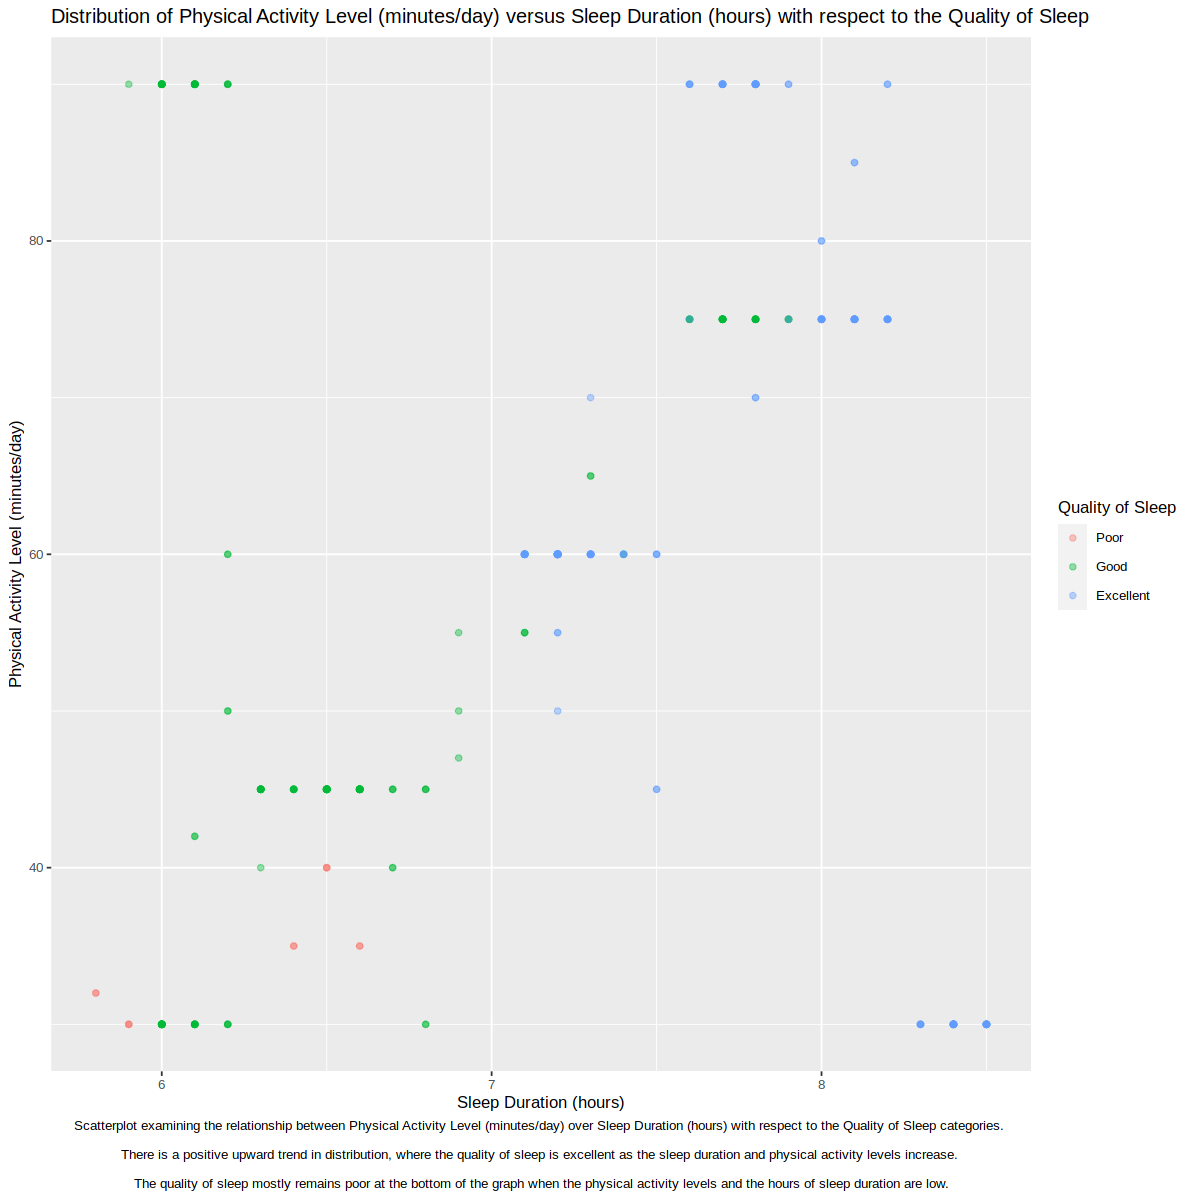

In [11]:
# Finally, we will create a visualization, a scatter plot (using geom_point), to explore the relationship of physical_activity_level versus sleep_duration with respect to the quality_of_sleep data.
# Created a new object: sleep_duration_plot


options(repr.plot.width = 10, repr.plot.height = 10)
sleep_duration_plot <- sleep_data_tidy |>
  ggplot(aes(x = sleep_duration, y = physical_activity_level, color = quality_of_sleep)) +
  geom_point(alpha = 0.4) +
  labs(x = "Sleep Duration (hours)",
       y = "Physical Activity Level (minutes/day)",
       color = "Quality of Sleep",
      caption = paste("Scatterplot examining the relationship between Physical Activity Level (minutes/day) over Sleep Duration (hours) with respect to the Quality of Sleep categories.",
                "\n\nThere is a positive upward trend in distribution, where the quality of sleep is excellent as the sleep duration and physical activity levels increase.",
                "\n\nThe quality of sleep mostly remains poor at the bottom of the graph when the physical activity levels and the hours of sleep duration are low.")) +
  ggtitle("Distribution of Physical Activity Level (minutes/day) versus Sleep Duration (hours) with respect to the Quality of Sleep") +
  theme(text = element_text(size = 10), plot.caption = element_text(hjust = 0.5))
       
sleep_duration_plot

In [12]:
# Now we will use the sleep data set to create model specificaiton for K-nearest neighbours classifiction, with sleep duration and physical activity levels as our predictor variables and quality of sleep as our categorical variable.
# We will store these parameters as a new data set named "sleep_data_trained".

sleep_data_train <- sleep_data_tidy |>
select(quality_of_sleep, sleep_duration, physical_activity_level) 

sleep_data_train 




quality_of_sleep,sleep_duration,physical_activity_level
<fct>,<dbl>,<dbl>
Poor,5.9,30
Poor,5.9,30
Poor,5.9,30
⋮,⋮,⋮
Excellent,8.1,75
Excellent,8.1,75
Excellent,8.1,75


In [13]:
# Creating the train/test split
# prop = 0.75 --> 75% of our original data set ends up in the training set.
# setting the strata argument to a categorical variable, which is "quality_of_sleep"

set.seed(1)
sleep_split <- initial_split(sleep_data_tidy, prop = 0.75, strata = quality_of_sleep)
sleep_train <- training(sleep_split)
sleep_test <- testing(sleep_split)


In [14]:
glimpse(sleep_train)

Rows: 280
Columns: 5
$ person_id               <dbl> 4, 6, 106, 51, 85, 86, 87, 88, 89, 91, 92, 93,…
$ gender                  <chr> "Male", "Male", "Male", "Male", "Male", "Femal…
$ sleep_duration          <dbl> 5.9, 5.9, 6.6, 7.5, 7.5, 7.2, 7.2, 7.2, 7.3, 7…
$ quality_of_sleep        <fct> Poor, Poor, Poor, Excellent, Excellent, Excell…
$ physical_activity_level <dbl> 30, 30, 35, 45, 60, 60, 60, 60, 60, 60, 60, 60…


In [15]:
# Using group_by and summarize functions to find the percentage of quality_of_sleep characteristics (either poor, good, or excellent)
# We are trying to see of the proportions were preserved or sustained after splitting the data

sleep_proportions <- nrow(sleep_train)
sleep_data_tidy|>
  group_by(quality_of_sleep) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100)

sleep_proportions

quality_of_sleep,count,percentage
<fct>,<int>,<dbl>
Poor,12,3.208556
Good,182,48.663102
Excellent,180,48.128342


[1] 280

In [16]:
# Training the classifier with K-nearest neighbor of 5 using sleep_duration and physical_activity_level as the predictors
set.seed(10)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5)|>
  set_engine("kknn") |>
  set_mode("classification")

sleep_recipe <- recipe(quality_of_sleep ~ sleep_duration + physical_activity_level, data = sleep_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_fit <- workflow() |>
  add_recipe(sleep_recipe)|>
  add_model(knn_spec) |>
  fit(data = sleep_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.06428571
Best kernel: rectangular
Best k: 5

In [17]:
# Predicting the labels in the test set
sleep_test_predictions <- predict(knn_fit, sleep_test)|>
bind_cols(sleep_test)

sleep_test_predictions

.pred_class,person_id,gender,sleep_duration,quality_of_sleep,physical_activity_level
<fct>,<dbl>,<chr>,<dbl>,<fct>,<dbl>
Poor,81,Female,5.8,Poor,32
Good,17,Female,6.5,Poor,40
Good,19,Female,6.5,Poor,40
⋮,⋮,⋮,⋮,⋮,⋮
Excellent,363,Female,8.2,Excellent,75
Excellent,367,Female,8.1,Excellent,75
Excellent,374,Female,8.1,Excellent,75


In [18]:
# Evaluating the classifier's performance

sleep_test_predictions |>
  metrics(truth = quality_of_sleep, estimate = .pred_class) |>
  filter(.metric == "accuracy")

confusion <- sleep_test_predictions |>
conf_mat(truth = quality_of_sleep, estimate = .pred_class)

sleep_test_predictions
confusion 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.893617


.pred_class,person_id,gender,sleep_duration,quality_of_sleep,physical_activity_level
<fct>,<dbl>,<chr>,<dbl>,<fct>,<dbl>
Poor,81,Female,5.8,Poor,32
Good,17,Female,6.5,Poor,40
Good,19,Female,6.5,Poor,40
⋮,⋮,⋮,⋮,⋮,⋮
Excellent,363,Female,8.2,Excellent,75
Excellent,367,Female,8.1,Excellent,75
Excellent,374,Female,8.1,Excellent,75


           Truth
Prediction  Poor Good Excellent
  Poor         2    0         0
  Good         3   46         6
  Excellent    0    1        36

In [28]:
# Cross validation of the training data - validation set 

sleep_split <- initial_split(sleep_train, prop = 0.75, strata = quality_of_sleep)
sleep_subtrain <- training(sleep_split)
sleep_validation <- testing(sleep_split)

sleep_recipe <- recipe(quality_of_sleep ~ sleep_duration + physical_activity_level, 
                        data = sleep_subtrain) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_fit <- workflow() |>
  add_recipe(sleep_recipe) |>
  add_model(knn_spec) |>
  fit(data = sleep_subtrain)

validation_predicted <- predict(knn_fit, sleep_validation) |>
  bind_cols(sleep_validation)

acc <- validation_predicted |>
  metrics(truth = quality_of_sleep, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()

acc

[1] 0.9577465

The accuracy estimate using this split is 95.77%

In [29]:
# Performing 5-fold cross validation and creating the data analysis workflow to run cross-validation on train/validation split

sleep_vfold <- vfold_cv(sleep_train, v = 5, strata = quality_of_sleep)

sleep_recipe <- recipe(quality_of_sleep ~ sleep_duration + physical_activity_level, 
                        data = sleep_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_fit <- workflow() |>
  add_recipe(sleep_recipe) |>
  add_model(knn_spec) |>
  fit_resamples(resamples = sleep_vfold)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9714889,5,0.012079414,Preprocessor1_Model01
2,accuracy,multiclass,0.9750604,5,0.009056982,Preprocessor1_Model02
3,accuracy,multiclass,0.9353201,5,0.020598597,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,accuracy,multiclass,0.7858100,5,0.02961777,Preprocessor1_Model48
49,accuracy,multiclass,0.7786671,5,0.02336496,Preprocessor1_Model49
50,accuracy,multiclass,0.7786671,5,0.02336496,Preprocessor1_Model50


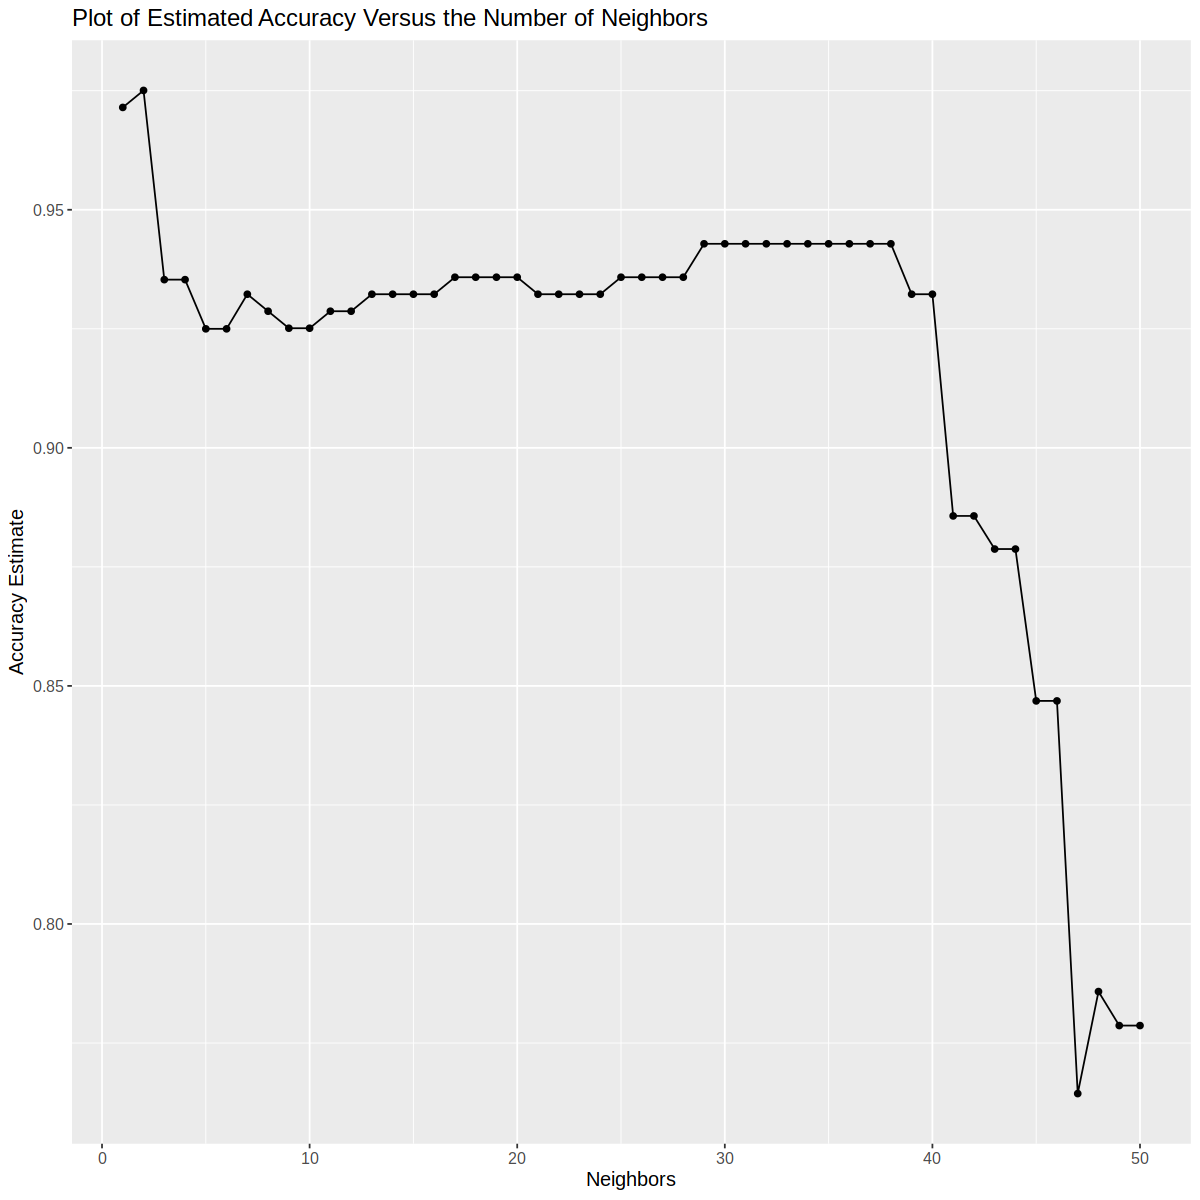

In [35]:

# Parameter value selection 

knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 50))

knn_results <- workflow() |>
  add_recipe(sleep_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = sleep_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate", title = "Plot of Estimated Accuracy Versus the Number of Neighbors") + 
  theme(text = element_text(size = 12))
options(plot.repr.width = 10, plot.repr.height = 8)

accuracy_vs_k

Based on this graph, setting the number of neighbors to K = 2 provides the highest accuracy (97.51%). However to prevent a tie, we would choose an odd k value with the next highest accuracy. This would mean k = 1 would be the highest accuracy (97.15%)

In [38]:
# Now that we have our ideal K value (K = 1), we will set a new observation at the sleep_duration = 7 hours and the physical_activity_levels = 80 minutes/day

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 1) |>
       set_engine("kknn") |>
       set_mode("classification")

sleep_recipe <- recipe(quality_of_sleep ~ sleep_duration + physical_activity_level, data = sleep_train) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())

sleep_fit <- workflow() |>
          add_recipe(sleep_recipe) |>
          add_model(knn_spec) |>
          fit(data = sleep_train)


new_sleep_quality <- tibble(sleep_duration = 9, physical_activity_level = 30)
new_sleep_predicted <- predict(sleep_fit, new_sleep_quality)



new_sleep_predicted

.pred_class
<fct>
Excellent
